# How to use the Vcsn library

## Writing your own code

Writing programs with Vcsn is pretty straight forward once you're familiar with the library.

### Static

When using the static version of the library you have to use algorithms from the `vcsn::` namespace. These algorithms are highly templated and hence require the user to know the context and parameters of these algorithms at compile time.
This part of the library provides less flexibility but ensures that all of the required code will be compiled before runtime.

### Dyn

The dyn version of the library consists of algorithms from the `vcsn::dyn::` namespace. These algorithms provide an abstraction from the static library that hides from users the actual fully templated versions of algorithms. This allows more flexibility as the user does not have to know the context of automata at compile time and new types of automata can be created at runtime. However, algorithms may need to be compiled at runtime, lowering the program's performances (once compiled algorithms are cached and can be used without further compilation though).

## Compiling with Vcsn

Compiling your program will then require to use the Vcsn program with the compile option and can be done as such:
`vcsn compile source.cc`

It is also possible to modify the programs compilation options and compiler in the command line option:
`vcsn compile CXX=g++ CXXFLAGS+=-g3 source.cc`

## Running the code

When actually running the program you just compiled you will have to use the Vcsn program as well through the run option:
`vcsn run bin`
The command can be followd directly by the arguments of your program.

# Examples

N.B.: Some other samples of code are present in the `tests/demo` directory of the project from which you can inspire yourself.

In [45]:
import vcsn

In [46]:
!cat ../../tests/demo/prod-eval.cc

// demaille.13.ciaa
#include <cassert>
#include <iostream>
#include <stdexcept>
#include <string>

#include <vcsn/core/mutable-automaton.hh>
#include <vcsn/ctx/traits.hh>
#include <vcsn/ctx/lal_char_z.hh>
#include <vcsn/dyn/algos.hh>
#include <vcsn/dyn/context.hh>
#include <vcsn/dyn/automaton.hh>
#include <vcsn/misc/raise.hh>

namespace vcsn
{
  namespace dyn
  {
    /// Dyn version of the read_automaton function.
    ///
    /// Read an automaton without knowing its context.
    static automaton read_automaton(const std::string& f)
    {
      auto is = open_input_file(f);
      return read_automaton(*is);
    }

    static label read_word(const context& ctx, const std::string& w)
    {
      std::istringstream is{w};
      auto res = read_label(make_word_context(ctx), is);
      require(is.peek() == EOF, "unexpected trailing characters: ", is);
      return res;
    }
  }

  /// Static version of the read_automaton function.
  ///
  /// Read an automaton with a specified context (fro

In [47]:
# Compile the prod-eval program.
!vcsn compile ../../tests/demo/prod-eval.cc

In [48]:
# Generate the two input automata for the prod-eval program.
!vcsn standard -C 'lal_char(01), z' -Ee '(0+1)*1(<2>0+<2>1)*' -o bin.gv
!vcsn standard -C 'lal_char(01), z' -Ee '(0+1)*0'             -o even.gv

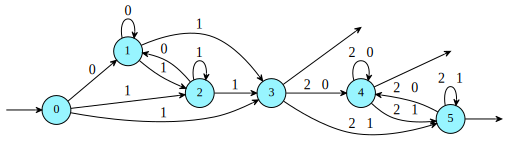

In [49]:
# This automaton decodes binary into decimal values.
bin = !cat bin.gv
bin = vcsn.automaton(' '.join(bin))
bin

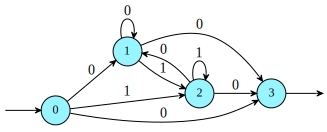

In [50]:
# This automaton only accepts even numbers.
even = !cat even.gv
even = vcsn.automaton(' '.join(even))
even

In [51]:
# Hence the prod-eval program evaluates the given word in the product of bin and even automata.
# The result is the decoded number if it is even else 0.
# The result is displayed twice, once for the dyn implementation and once for static one.
!for i in 0 1 10 1110 101010 101011;\
do\
    printf "%6s: " $i; \
    vcsn run ../../tests/demo/prod-eval bin.gv even.gv $i;\
done

     0: 0, 0
     1: 0, 0
    10: 2, 2
  1110: 14, 14
101010: 42, 42
101011: 0, 0


In [52]:
# This could have been done this way in python:
for i in [0, 1, 10, 1110, 101010, 101011]:
    print('{:6d} : {}'.format(i, (bin & even).eval(i)))

     0 : 0
     1 : 0
    10 : 2
  1110 : 14
101010 : 42
101011 : 0
